In [1]:
import gym
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines.td3.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, TD3, results_plotter
from stable_baselines.bench import Monitor

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
log_dir = './temp'
base_env = gym.make('Humanoid-v2')
env = DummyVecEnv([lambda: Monitor(base_env, log_dir, allow_early_resets=True)])
# env = gym.make('Humanoid-v2')
# env = DummyVecEnv(Monitor([lambda: env, "/tmp/sac/"]))

C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.

In [1]:
timesteps = 1000000
log_interval = 1000

In [6]:
policy_kwargs = {
#     'act_fun': tf.nn.tanh,
#     'net_arch': [32, 32]
}
# model = PPO2(MlpPolicy, env, n_steps=4096, nminibatches=64, lam=0.95, gamma=0.99, noptepochs=10, ent_coef=0.0, learning_rate=lambda f: 1e-4 * f, cliprange= 0.1, verbose=2)
model = TD3(LnMlpPolicy, env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=timesteps, log_interval=log_interval)
model.save('td3lnmlp')

---------------------------------------
| current_lr              | 0.0003    |
| ep_rewmean              | 354       |
| episodes                | 1000      |
| eplenmean               | 69.2      |
| fps                     | 131       |
| mean 100 episode reward | 354       |
| n_updates               | 60000     |
| qf1_loss                | 11.85134  |
| qf2_loss                | 11.172181 |
| time_elapsed            | 457       |
| total timesteps         | 60136     |
---------------------------------------
---------------------------------------
| current_lr              | 0.0003    |
| ep_rewmean              | 626       |
| episodes                | 2000      |
| eplenmean               | 124       |
| fps                     | 131       |
| mean 100 episode reward | 626       |
| n_updates               | 166300    |
| qf1_loss                | 10.342842 |
| qf2_loss                | 11.331235 |
| time_elapsed            | 1264      |
| total timesteps         | 166467    |


In [2]:
import gym
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines.td3.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, TD3, results_plotter
from stable_baselines.bench import Monitor

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
log_dir = './temp'
base_env = gym.make('Humanoid-v2')
env = DummyVecEnv([lambda: Monitor(base_env, log_dir, allow_early_resets=True)])
# env = gym.make('Humanoid-v2')
# env = DummyVecEnv(Monitor([lambda: env, "/tmp/sac/"]))

C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.

In [3]:
model = TD3.load('td3', env=env)
obs = env.reset()
try:
    for i in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()
finally:
    env.close()





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Creating window glfw


<Figure size 432x288 with 0 Axes>

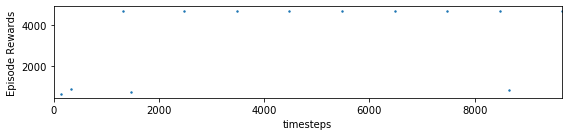

In [4]:
plt.figure()
results_plotter.plot_results(["."], timesteps, results_plotter.X_TIMESTEPS, "")
plt.show()